# Intelligent Systems 2022: Practical Assignment No 1

This is the first assignment for Intelligent Systems. Since we are only starting, we will try to keep it short and will try to get you familiar with some basic data structures and will have a first look at search algorithms.



## Graphs, Trees, and a bit of Search

Your name: Amund Strøm

Your VUNetID: ast101

If you do not provide your name and VUNetID we will not accept your submission. 

### Learning objectives

At the end of this exercise you should be able to understand basic ideas on how to represent graphs and trees in python. Furthermore, we will have a look into search algorithms in trees.

1. Understanding graph datastructures
2. Make small modifications of the code to implement a tree datastructure
3. Modify a tree search algorithm

### Practicalities

Follow this Notebook step-by-step. 

Of course, you can do the exercises in any Programming Editor of your liking. 
But you do not have to. Feel free to simply write code in the Notebook. Please use your studentID+Assignment1.ipynb as the name of the Notebook.  

Note: Unlike the courses dedicated to programming we will not evaluate the style of the programs. But we will, however, test your programs on other data that we provide, and your program should give the correct output to the test-data as well.

As was mentioned, the assignment is graded as pass/fail. To pass you need to have either a full working code or an explanation of what you tried and what didn't work for the tasks that you were unable to complete (you can use multi-line comments or a text cell).

## Initialising 

First, let us make sure the necessary packages are installed, and imported. Run the following code:

In [29]:
import sys
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install networkx
!{sys.executable} -m pip install decorator==5.0.9
import datetime
import numpy as np
from numpy import random


# This might produce a warning that numpy is already installed. 

## Representing Graphs in Python



<img src="graph.png" width="300"/>


### Graph with Dictionaries

#### Task 1
Represent the graph from the figure as in a Python dictionary and describe your datastructure.

In [30]:
dict_graph = { "a" : ["b"],
          "b" : ["a", "c", "d"],
          "c" : ["b", "d", "e", "f"],
          "d" : ["b", "c"],
          "e" : ["c"],
          "f" : ["c"]
        }

In [31]:
dict_graph_explanation = """
In the code above we initialized a python dictonary where the six nodes in the graph are represented as keys (a-f).
Each key has a value containing the list of connections to other nodes.
"""

### Graph with Adjacency Matrices

As mentioned in the working groups and the 1st working group exercise sheet, you can represent graphs also as adjancency matrices with 0 and 1. This is a standard format for representing graphs that we therefore will also explore practically.


#### Task 2
Come up with your own adjacency matrix representation for the graph from above in Python.
Then describe what you did in a couple of sentences.

In [32]:
            # a, b, c, d, e, f
adj_graph = [[0, 1, 0, 0, 0, 0], # a
             [1, 0, 1, 1, 0, 0], # b
             [0, 1, 0, 1, 1, 1], # c
             [0, 1, 1, 0, 0, 0], # d
             [0, 0, 1, 0, 0, 0], # e
             [0, 0, 1, 0, 0, 0]  # f
]

    

In [33]:


adj_graph_explanation = """
The code above is a matrix which is lists within a list, thus creating rows and columns.
Each row and column is represented by a comment which tells what node it is. 
Each row and column describes the connection to other nodes with either a zero (not connected) or one (connected).
"""



## Representing Trees in Python

As for many abstract datastructures, there is many ways on how to represent them in Python. In this tasks, we will have a look at some helpful representations for graphs and trees. 
There are actually many more that you will encounter throughout your studies, because graphs and trees are maybe the most important data structures in AI and computer science.


### Binary Trees

In [34]:
class Node:
    def __init__(self, val):
        self.left = None
        self.right = None
        self.value = val

class Tree:
    def __init__(self):
        self.root = None

    def getRoot(self):
        return self.root

    def add(self, val):
        if self.root is None:
            self.root = Node(val)
        else:
            self._add(val, self.root)

    def _add(self, val, node):
        if val < node.value:
            if node.left is not None:
                self._add(val, node.left)
            else:
                node.left = Node(val)
        else:
            if node.right is not None:
                self._add(val, node.right)
            else:
                node.right = Node(val)

    def search(self, v):
        """
        Perform binary search to find the node with the input value
        """
        if self.root is None:
            return None
        else:
            self._search(v, self.root)

    
    def _search(self, v, node):
        if node.value == v:
            print(f"Found {node.value}")
            return node
        elif (node.left is not None and node.value > v):
            self._search(v, node.left)
        elif (node.right is not None and node.value < v):
            self._search(v, node.right)
        return False # Error
        
# Initialize datastructure
tree = Tree()

# Generate list of length 20 with random numbers without duplicates
node_values = random.choice(np.arange(1, 50), size=20, replace=False)
print(node_values)

# Add random list into binary tree
for value in node_values:
    Tree.add(tree, value)

# Get root of tree
print(Tree.getRoot(tree).value)

# Search for every number in list
for value in node_values:
    Tree.search(tree, value)


[27 33 15 34 40  5 41 31  4 36 47 20 39 45  8  1 13  2 42 12]
27
Found 27
Found 33
Found 15
Found 34
Found 40
Found 5
Found 41
Found 31
Found 4
Found 36
Found 47
Found 20
Found 39
Found 45
Found 8
Found 1
Found 13
Found 2
Found 42
Found 12


Try to play around with the code of the binary tree to get an idea of what exactly is happening. 
Also try to draw a binary tree on paper, to get a better idea of what it is.

### Task 3
Add 20 nodes to the binary tree and complete the method that searches for the node with a certain value.
Afterwards describe the algorithm and the idea of your algorithm in at least 5 sentences.

*Hint: It might be a good idea to have a closer look at the add function to complete the search function*

In [35]:
explain_binary="""
The search algorithm almost works the same way as adding new values into the binary tree.
The algorithm goes through 1-3 steps and takes a value as input:
    1 - Compare the input with the current node
        Return if it is equal, continue otherwise.
    2 - Check if LEFT node exists and if the input is SMALLER than the value in the current node
        Traverse to the left node if this is the case, continue otherwise.
    3 - Check if RIGHT node exists and if the input is LARGER than the value in the current node
        Traverse to the RIGHT node if this is the case, continue otherwise.
    4 - Error
"""

## NetworkX

In the next step, we will have a look at one of Python's most popular libraries for graphs and trees.
You can have a quick look at the [libraries tutorial](https://networkx.org/documentation/stable/tutorial.html) to get an idea on how it works.


As a first example, we can initialize a graph object from the adjacency matrix that you have created above.
And we will also draw this graph.
If this does not work, try to reinstall the packages from above and reboot the notebook.
There might be an issue with the *Decorator* package. 

Afterwards, we will look into creating a tree manually.


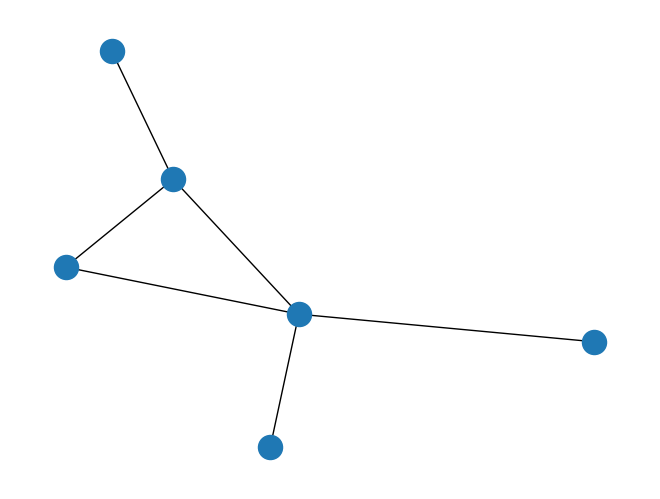

In [36]:
import networkx as nx
G = nx.from_numpy_array(np.array(adj_graph)) # nx.from_numpy_matrix did not work
nx.draw(G)

### Task 4

Create a new NetworkX graph and manually add nodes and edges, so that you end up with a full 3-ary tree of depth 2.

Afterwards, use the draw function to check, if it worked out.

depth one: 2
     depth two: 5
     depth two: 6
     depth two: 7
depth one: 3
     depth two: 8
     depth two: 9
     depth two: 10
depth one: 4
     depth two: 11
     depth two: 12
     depth two: 13


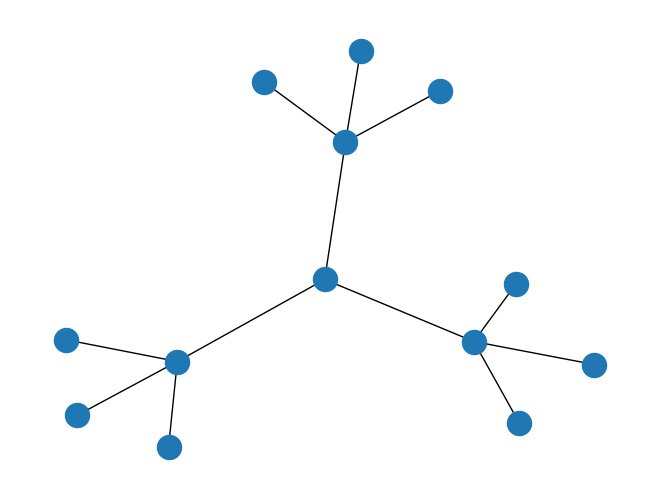

In [37]:
G = nx.Graph()  # Initialize graph

G.add_node(1) # Root node

# Add nodes in depth 1 and connect to root
for idx, depth_one in enumerate(range(2,5)):
    G.add_node(depth_one)
    G.add_edge(1, depth_one)
    print("depth one:", str(depth_one))
    # Add nodes in depth 2 and connect to parent
    for depth_two in range((depth_one * 2) + idx + 1 , (depth_one * 2) + idx + 4):
        G.add_node(depth_two)
        G.add_edge(depth_one, depth_two)
        print("     depth two:", str(depth_two))

nx.draw(G)

### Final Task: Collect all the results

Fill in your student number in the variable and then run this cell (and all the cells above) to generate the text file that you have to hand in together with the notebook on canvas!

In [38]:
def exportToText(*args):
    with open(args[0], "w") as f:
        for argument in args:
            f.write("{}\n".format(argument))

exportToText("assignment1.txt","2822237", dict_graph_explanation, adj_graph_explanation, explain_binary)